In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['figure.figsize'] = 20, 15
dic = {"size": 14}
matplotlib.rc('font', **dic)
df = pd.read_csv("archive/heart_statlog_cleveland_hungary_final.csv")
df.shape


(1190, 12)

In [2]:
cols = list(df.dtypes[df.dtypes != 'object'].index.values) 
df_numeric = df.loc[:, cols]
df_numeric

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:

df_numeric.corr()['target'].sort_values()

max heart rate        -0.413278
cholesterol           -0.198366
resting ecg            0.073059
resting bp s           0.121415
fasting blood sugar    0.216695
age                    0.262029
sex                    0.311267
oldpeak                0.398385
chest pain type        0.460127
exercise angina        0.481467
ST slope               0.505608
target                 1.000000
Name: target, dtype: float64

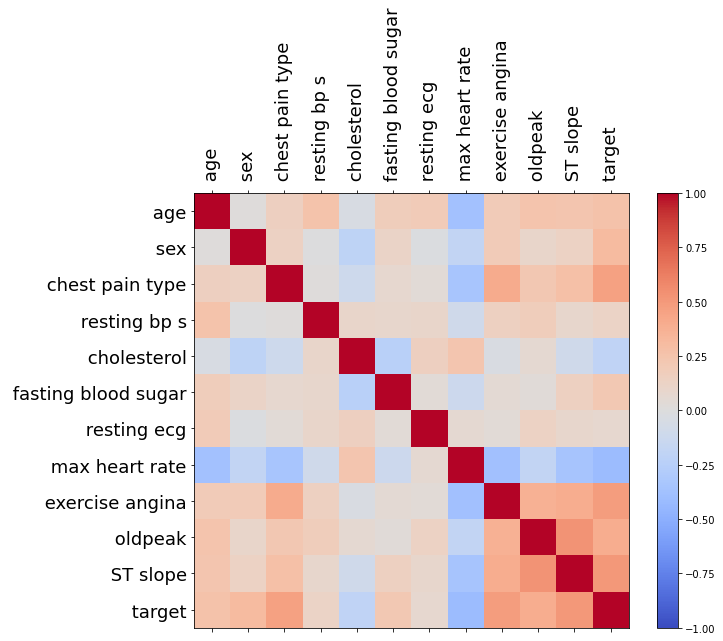

In [4]:
#accumilative graph
x = df_numeric
alpha = x.corr().columns
# dont show horizontal lines
plt.rcParams["axes.grid"] = False
# create the figure object 
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# to show color bar
fig.colorbar(cax)
#rotate writing vertical so they dont touch
plt.xticks(rotation='vertical')
#put the values in x and y axix
ax.set_xticks(np.arange(len(alpha)))
ax.set_yticks(np.arange(len(alpha)))
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)
ax.tick_params(labelsize = 18)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chest pain type'}>],
       [<AxesSubplot:title={'center':'resting bp s'}>,
        <AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'fasting blood sugar'}>],
       [<AxesSubplot:title={'center':'resting ecg'}>,
        <AxesSubplot:title={'center':'max heart rate'}>,
        <AxesSubplot:title={'center':'exercise angina'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'ST slope'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

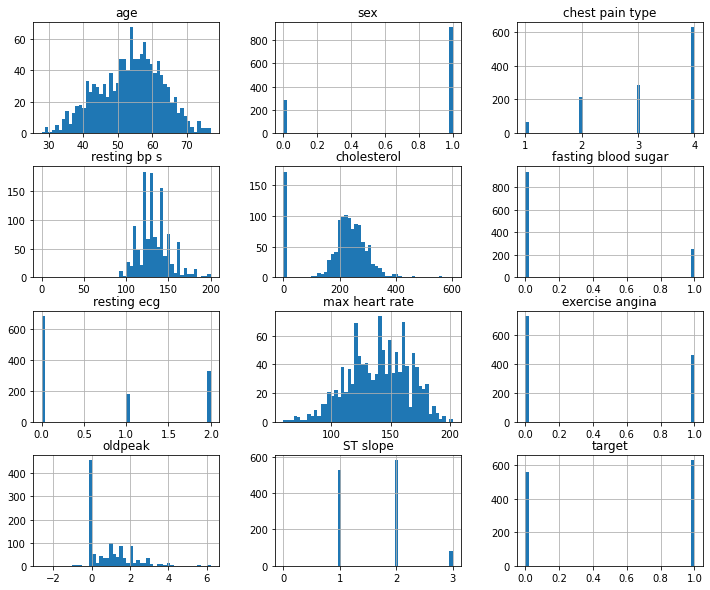

In [5]:
df_numeric.hist(bins=50, figsize=(12,10))